## The basics of image processing with filtering

In [20]:
pip install opencv-python

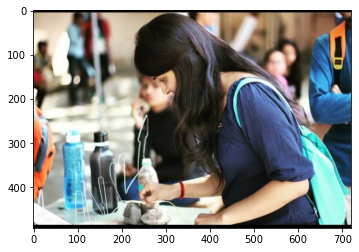

In [5]:
#Import the image and convert to RGB
import cv2
import matplotlib.pyplot as plt
#Reading an original image
img = cv2.imread("Image_CNN.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Original Image

## Blurring

There are several techniques used to achieve blurring effects but here we use the four major ones used in OpenCV: Averaging blurring, Gaussian blurring, median blurring and bilateral filtering. All four techniques have a common basic principle, which is applying convolutional operations to the image with a filter (kernel). The values of the applying filters are different between the four blurring methods.

Average blurring is taking the average of all the pixel values under the given kernel area and replace the value at the center.

Medium blurring is the same with average blurring except that it uses the median value instead of the average. Therefore when we have to handle sudden noises in the image such as ‘salt and pepper noise,’ it’ll be better to use medium blurring than average blurring.

Gaussian blurring is nothing but using the kernel whose values have a Gaussian distribution. The values are generated by a Gaussian function so it requires a sigma value for its parameter. It’s good to apply this method to the noises that have a normal distribution such as white noise.

Bilateral Filtering is an advanced version of Gaussian blurring. Blurring produces not only dissolving noises but also smoothing edges. And bilateral filter can keep edges sharp while removing noises. It uses Gaussian-distributed values but takes both distance and the pixel value differences into account. Therefore it requires sigmaSpace and sigmaColor for the parameters.

In [6]:
# Plot the image with different kernel sizes
kernels = [5, 11, 17]

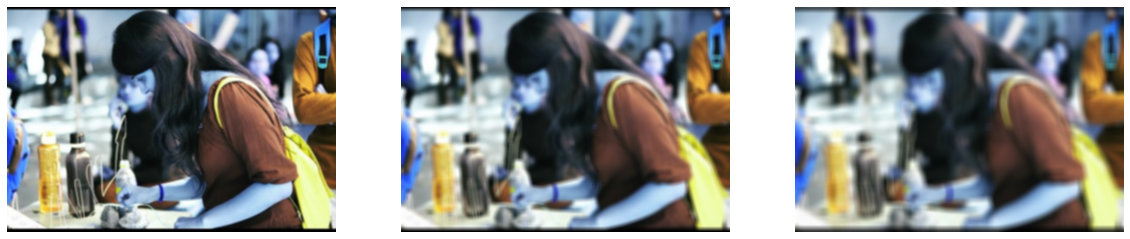

In [7]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis("off")
plt.show()

(a). (5, 5)Kernel

(b). (7, 7)Kernel

(c). (11, 11)Kernel

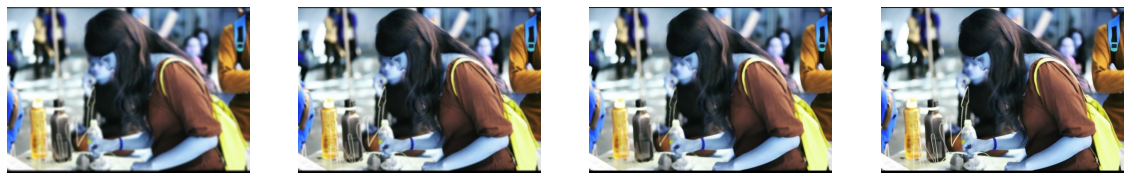

In [10]:
# Blur the image 
img_0 = cv2.blur(img, ksize = (7, 7))
img_1 = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv2.medianBlur(img, 7)
img_3 = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)
# Plot the images
images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()

a. Average Blur

b. Gaussian Blur

c. Median Blur

d. Bilateral Blur

## Thresholding

Thresholding transforms images into binary images. We need to set the threshold value and max values and then we convert the pixel values accordingly. There are five different types of thresholding: Binary, The Inverse of Binary, Threshold to zero, The Inverse of Threshold to Zero, and Threshold truncation.

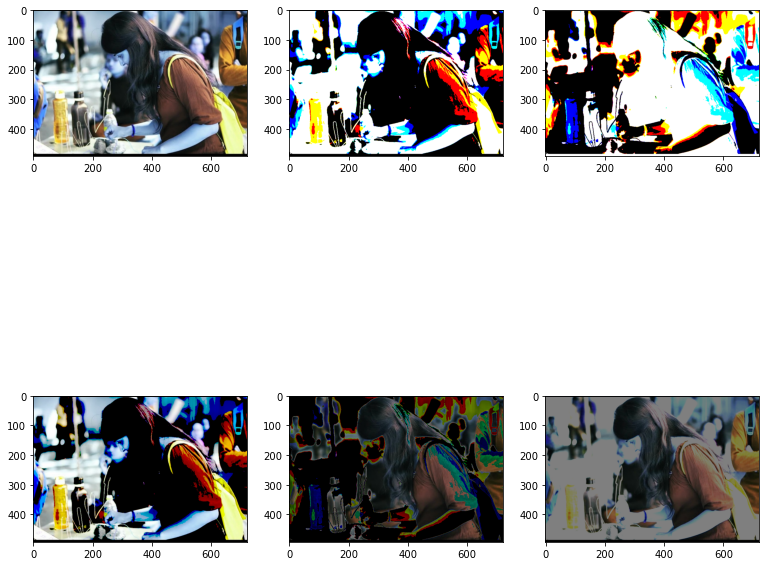

In [11]:
img = cv2.imread('Image_CNN.jpg')
# Thresholding 
_, thresh_0 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, thresh_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
# Plot the images
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
plt.show()

a. Threshold Original Image

b. Threshold Binary

c.Threshold to Binary Inversion

d. Threshold to Zero

e. Threshold to Zero Inversion

f. Threshold Truncation

The images are way better for us to comprehend the difference between the types.
But it’s too harsh to take just one value of threshold and apply it to all parts of an image.  A better approach would be using different thresholds for each part of the image. There is another technique called Adaptive thresholding, which serves this issue. By calculating the threshold within the neighborhood area of the image, we can achieve a better result from images with varying illumination.

In [13]:
# Convert the image to grayscale
img = cv2.imread('Image_CNN.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Adaptive Thresholding
_, thresh_binary = cv2.threshold(img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)

We need to convert the color mode to grayscale to apply adaptive thresholding. The parameters of adaptive thresholding are maxValue (which I set 255 above), adaptiveMethod , thresholdType , blockSize and C . And the adaptive method here has two kinds: ADAPTIVE_THRESH_MEAN_C , ADAPTIVE_THRESH_GAUSSIAN_C .

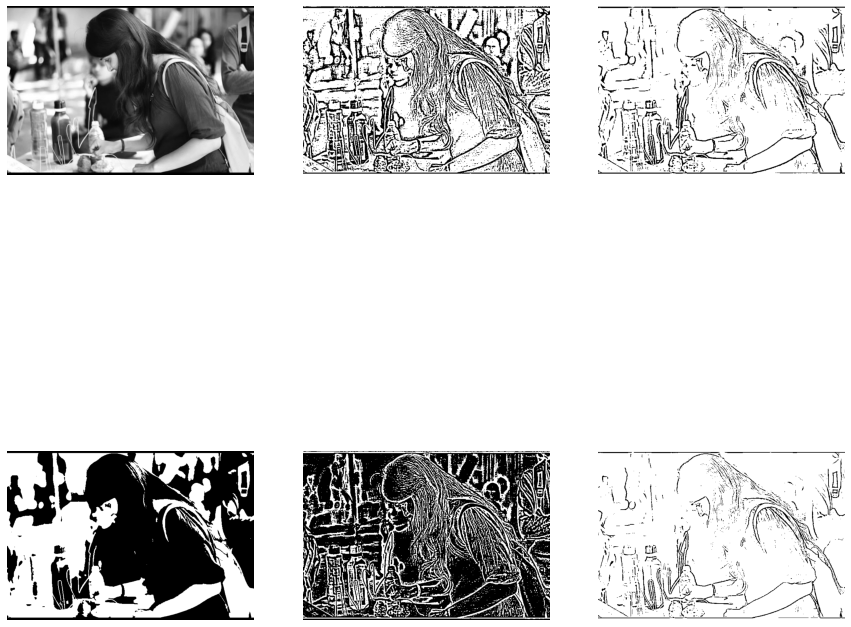

In [14]:
# Plot the images
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

a. Original Image

b. Adaptive Threshold Mean C=2

c. Adaptive Threshold Mean C=8

d. Threshold Binary

e. Adaptive Threshold Mean Inverse C=2

f. Adaptive Threshold Gaussian C=8

We have the original image and the one with binary thresholding on the left line. Compare this with the second and third image on the upper line, which is produced by ADAPTIVE_THRESH_MEAN_C . It shows a more detailed result than that of binary thresholding. We can also see that it gets more explicit when the C value is bigger. C indicates how much we’ll subtract from the mean or weighted mean. With the two images on the right line, we can also compare the effect of ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C with the same C value.

## Gaussian

The image gradient represents directional changes in the intensity or color mode and we can use this concept for locating edges.

In [15]:
# Apply gradient filtering
sobel_x = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y,
                          beta=0.5, gamma=0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

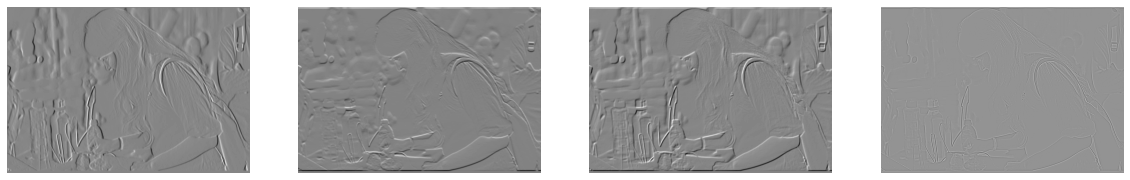

In [16]:
# Plot the images
images = [sobel_x, sobel_y, blended, laplacian]
plt.figure(figsize = (20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')
plt.show()

a. Sobel X

b. Sobel Y

c. Sobel X+Y

d. Laplacian

It’s apparent that the first and second image have a directional pattern. With the first image, we can clearly see the edges in the vertical direction. With the second image, we can see the horizontal edges. And both the third and fourth images, the edges on both directions are shown.

## Morphological Operations

It’s also possible to manipulate the figures of images by filtering, which is called as morphological transformation.


Erosion - is the technique for shrinking figures and it’s usually processed in a grayscale. The shape of filters can be a rectangle, an ellipse, and a cross shape. By applying a filter we remove any 0 values under the given area.


Dilation is the opposite to erosion. It is making objects expand and the operation will be also opposite to that of erosion.

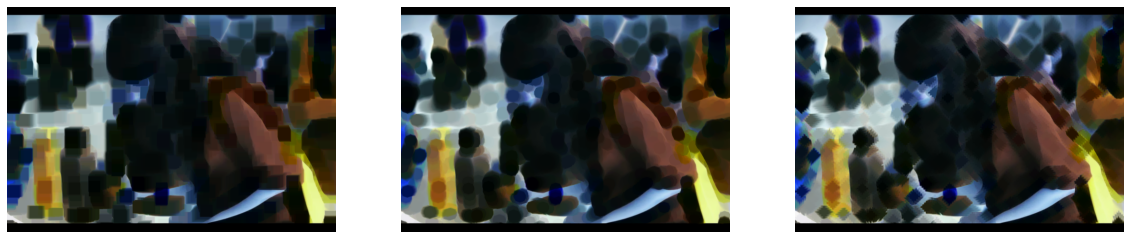

In [18]:
img = cv2.imread('Image_CNN.jpg')
import numpy as np
# Create erosion kernels 
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
kernels = [kernel_0, kernel_1, kernel_2]
# Plot the images
plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv2.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

a. Basic Kernel

b. Ellipse Kernel

c. Cross Kernel

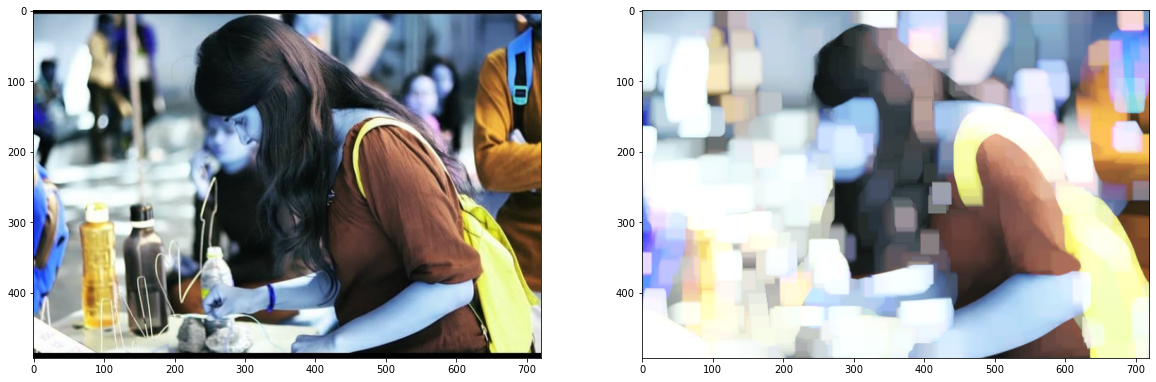

In [21]:
# Apply dilation
kernel = np.ones((9, 9), np.uint8)
img_dilate = cv2.dilate(img, kernel, iterations = 3)
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2); plt.imshow(img_dilate, cmap="gray")
plt.show()

Opening and closing operation is the mixed version of erosion and dilation. Opening performs erosion first and then dilation is performed on the result from the erosion while closing performs dilation first and the erosion.